In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt


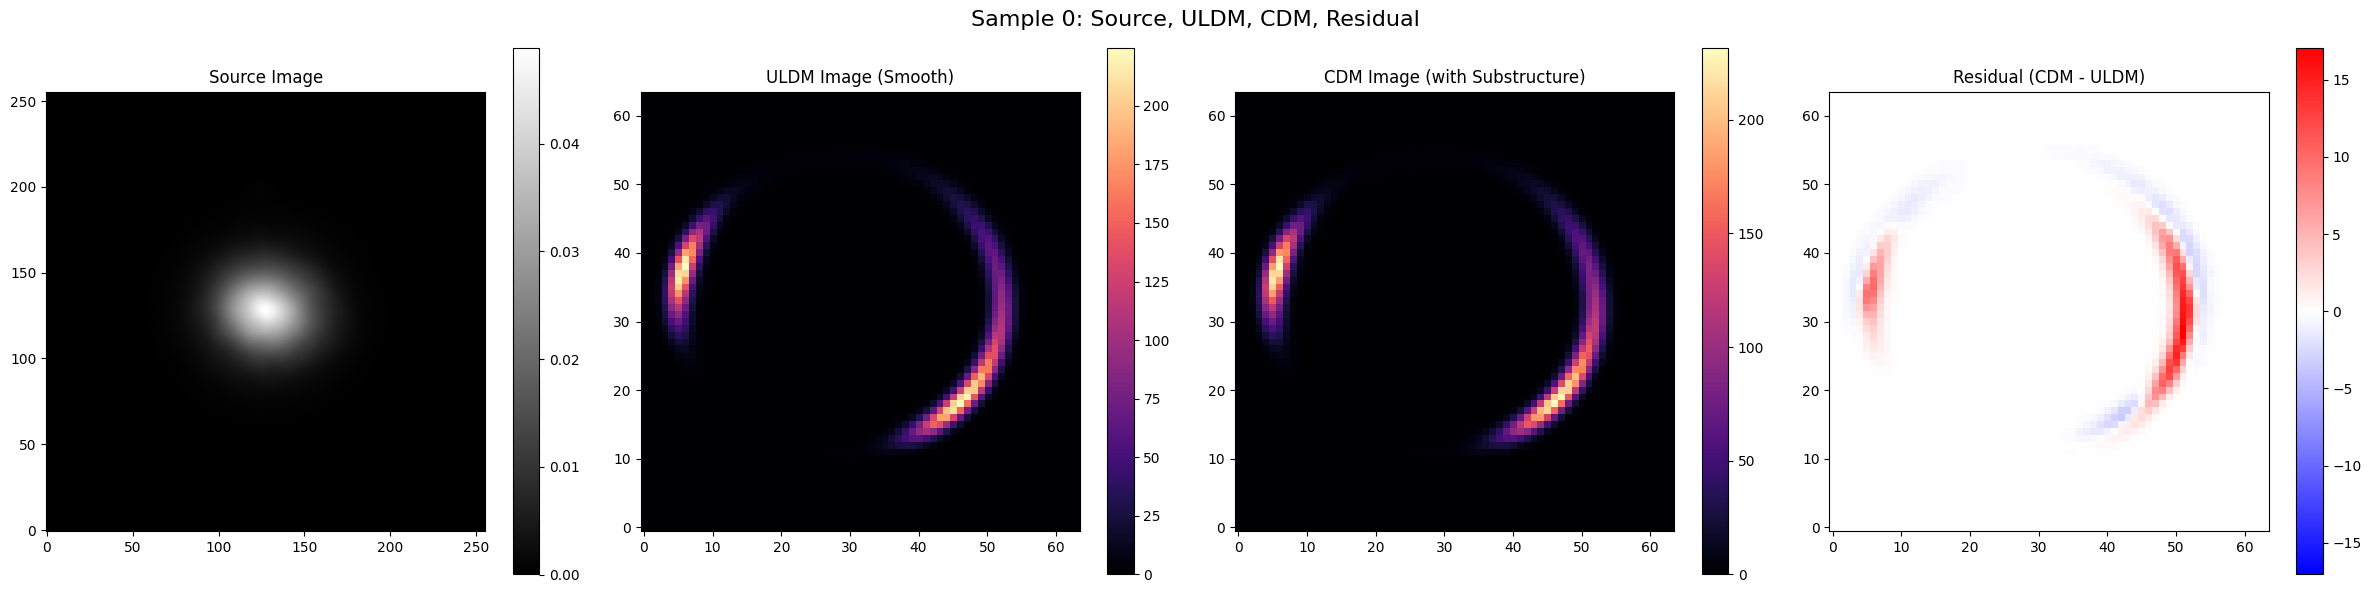

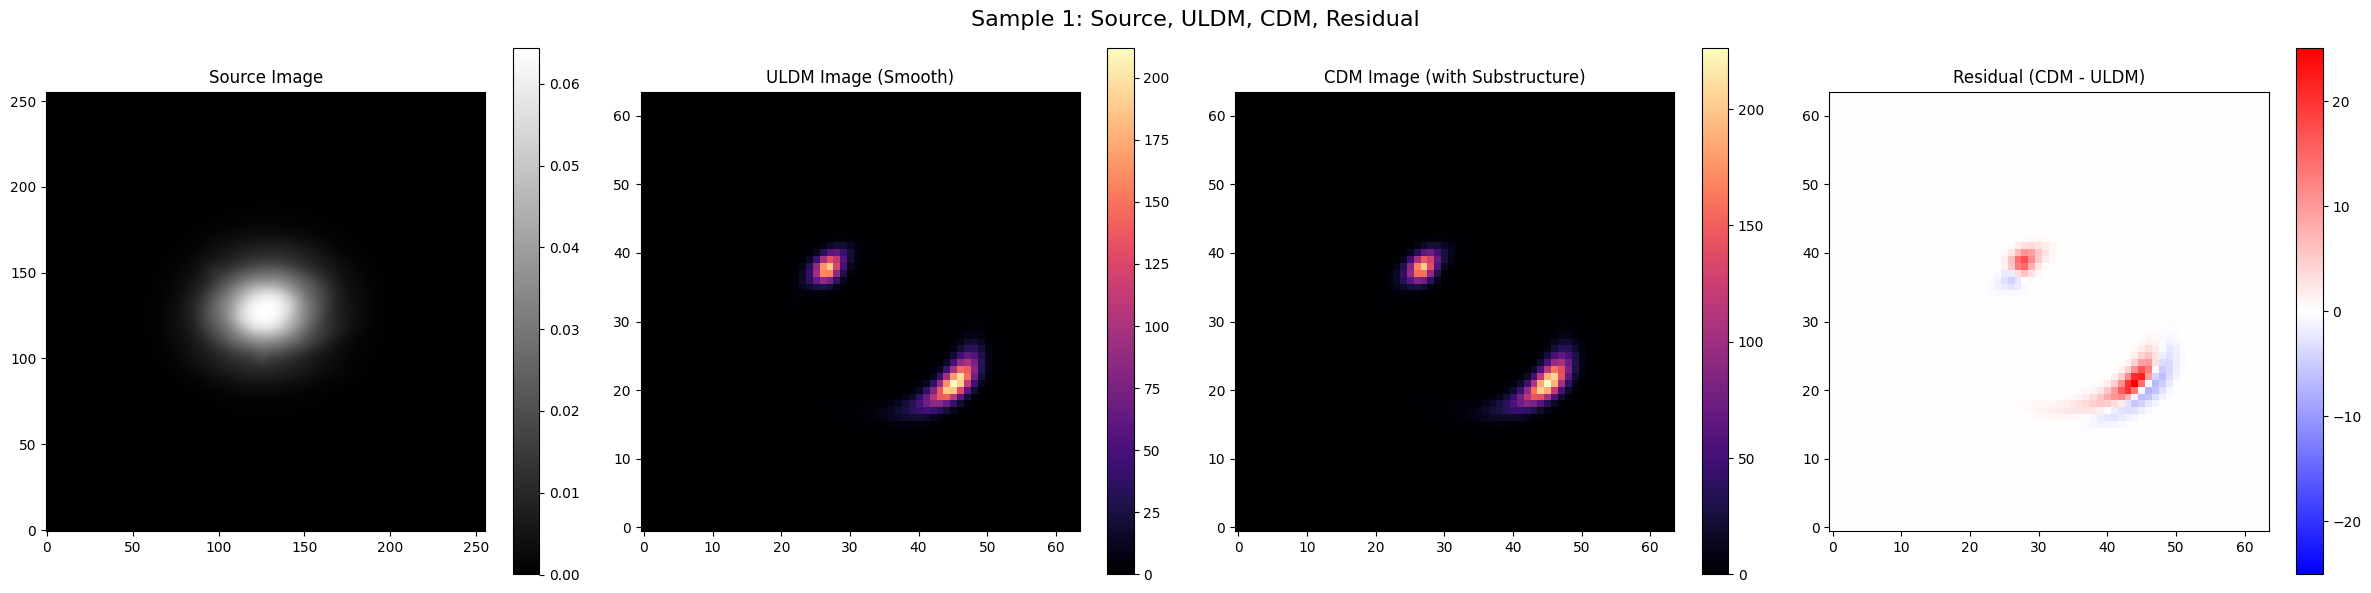

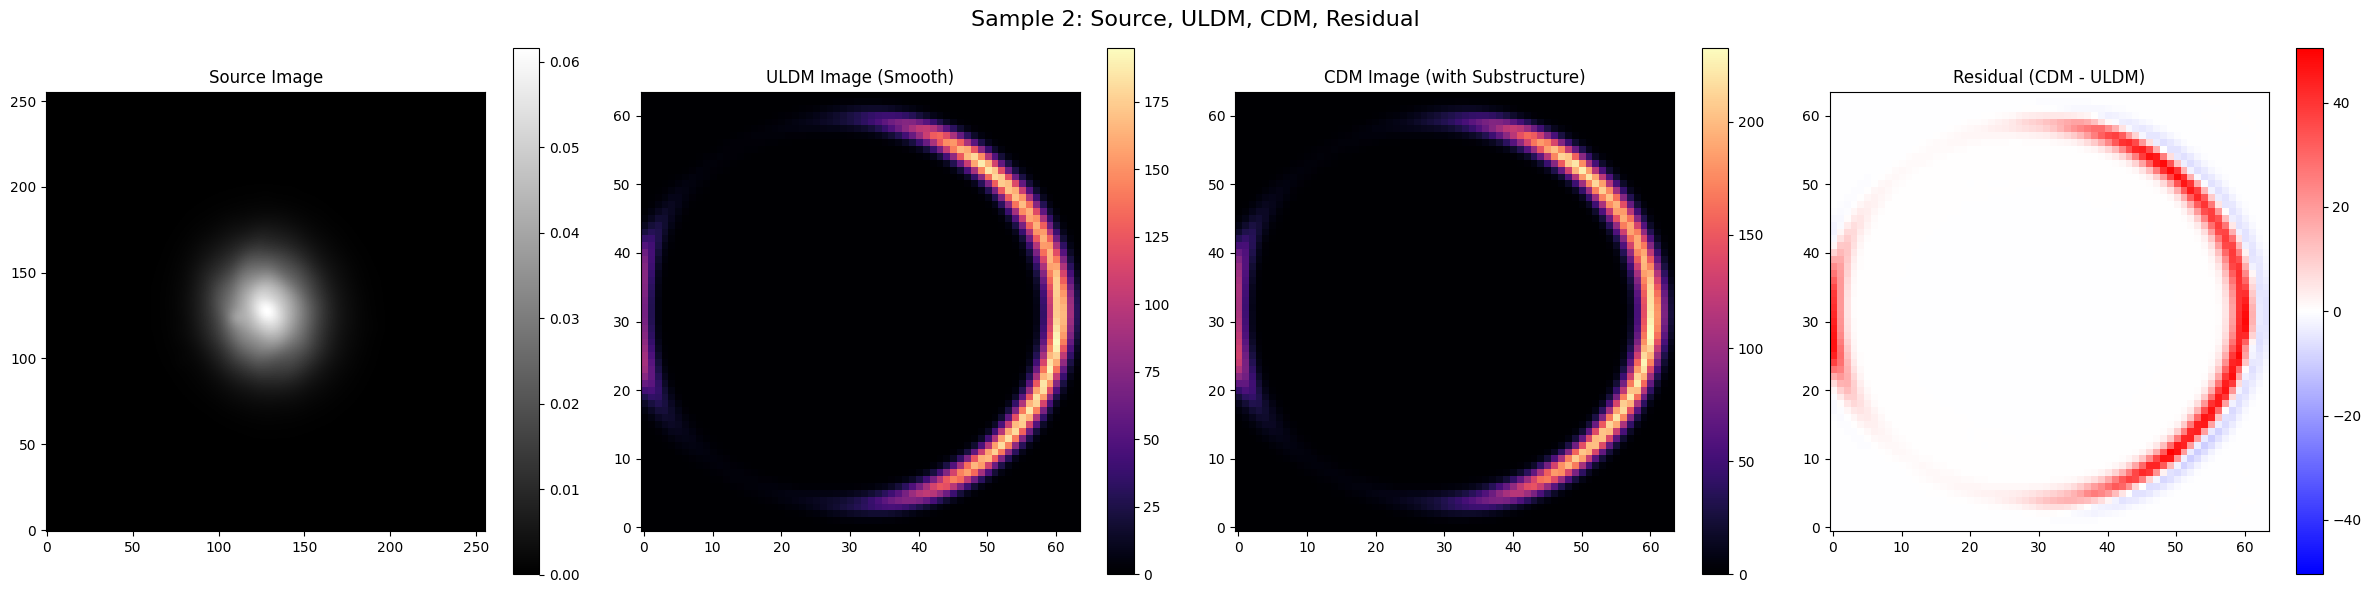

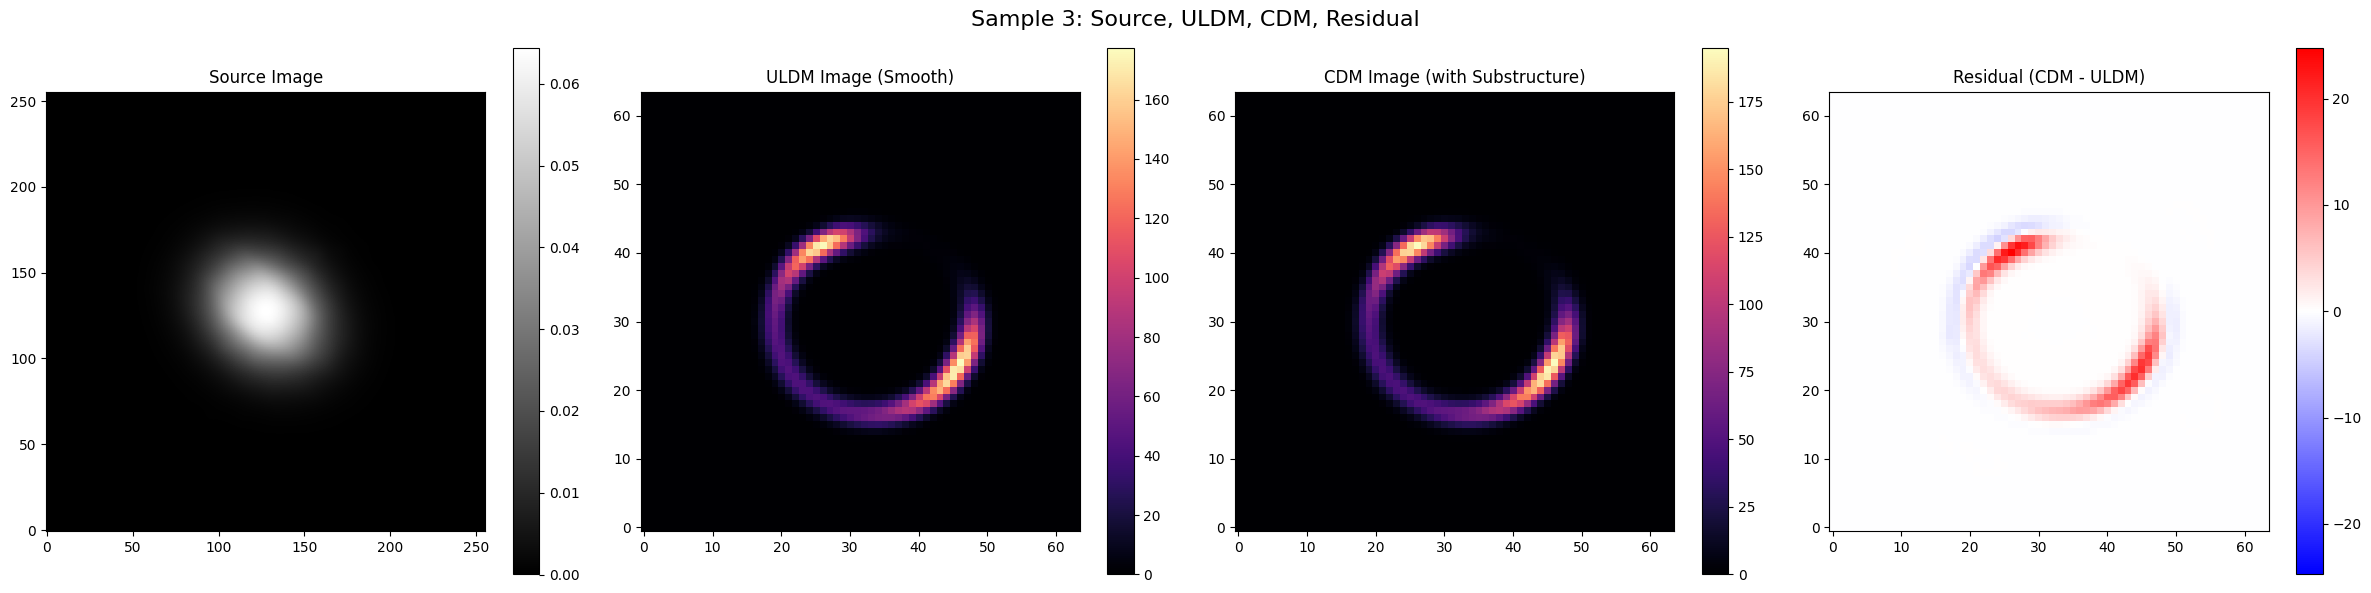

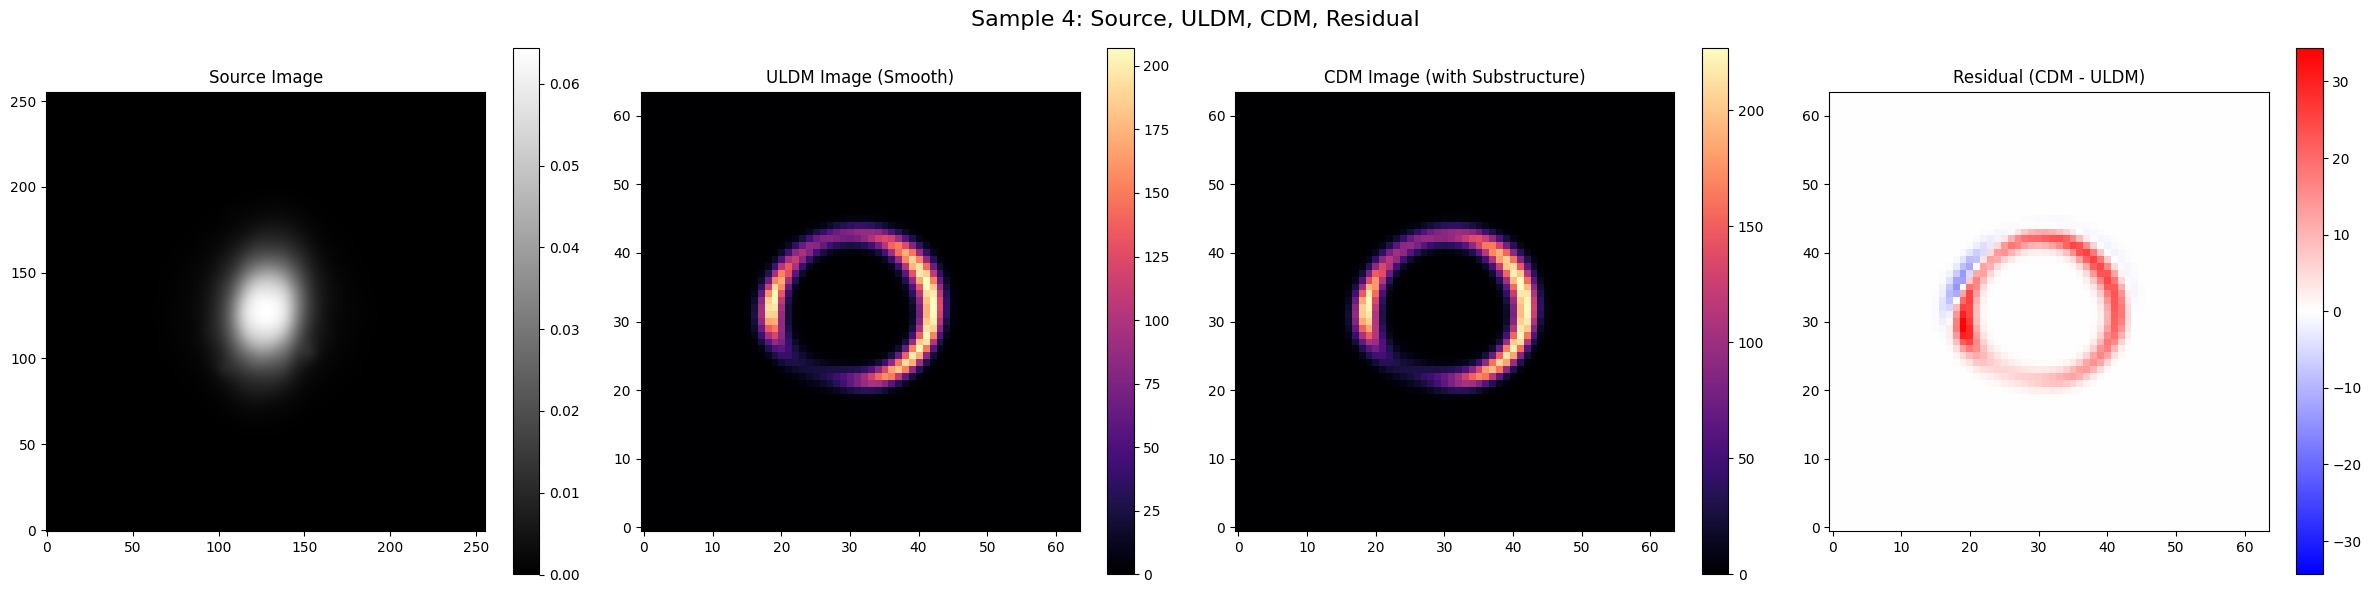

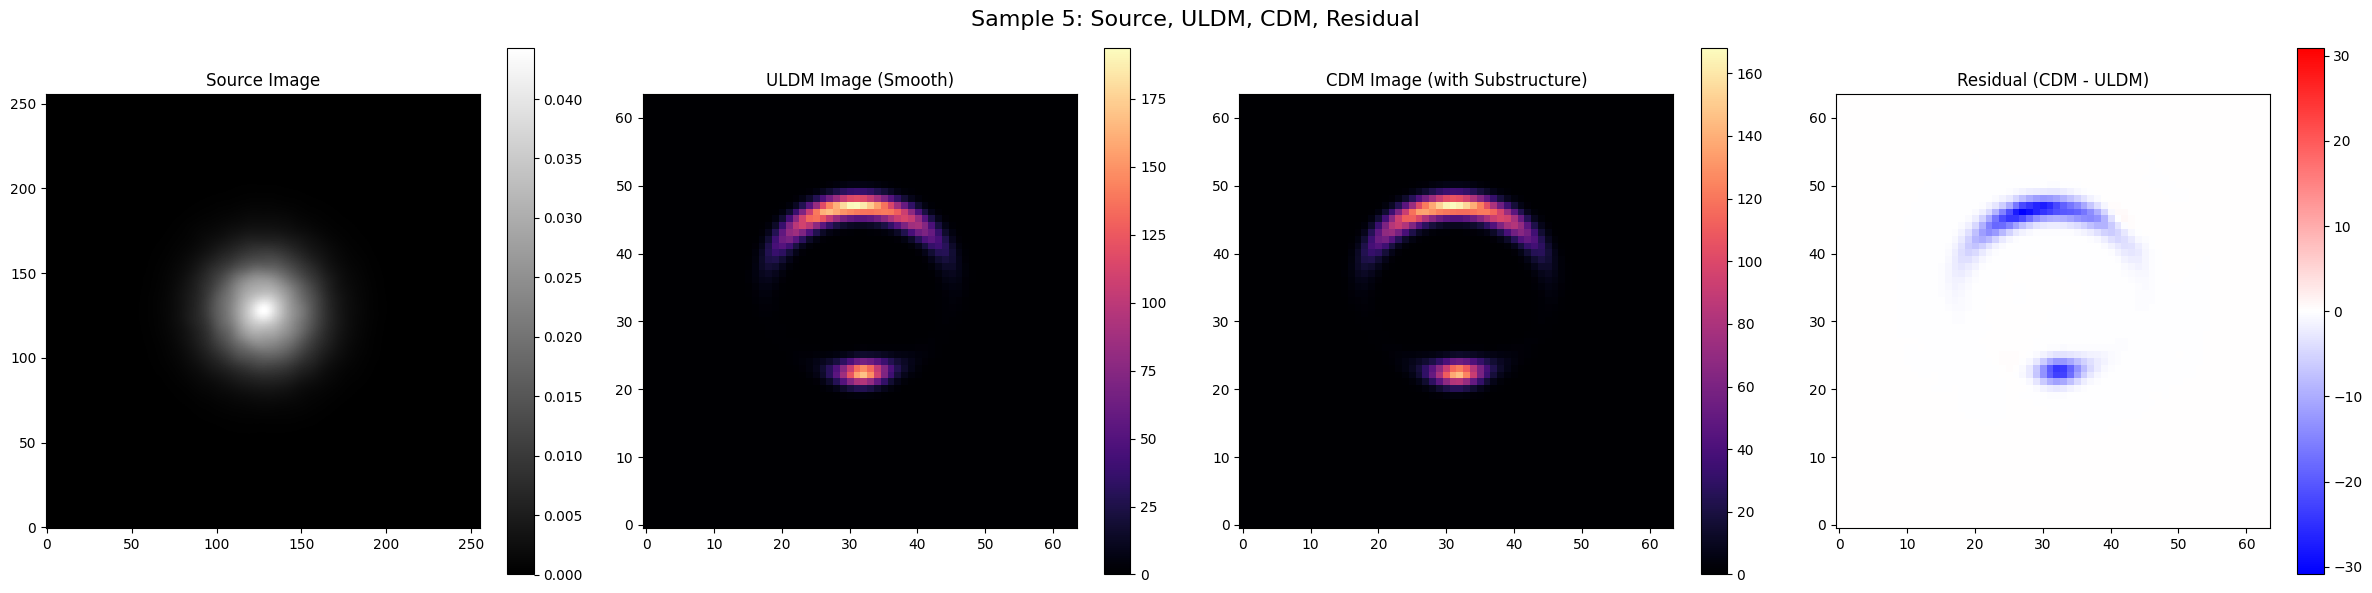

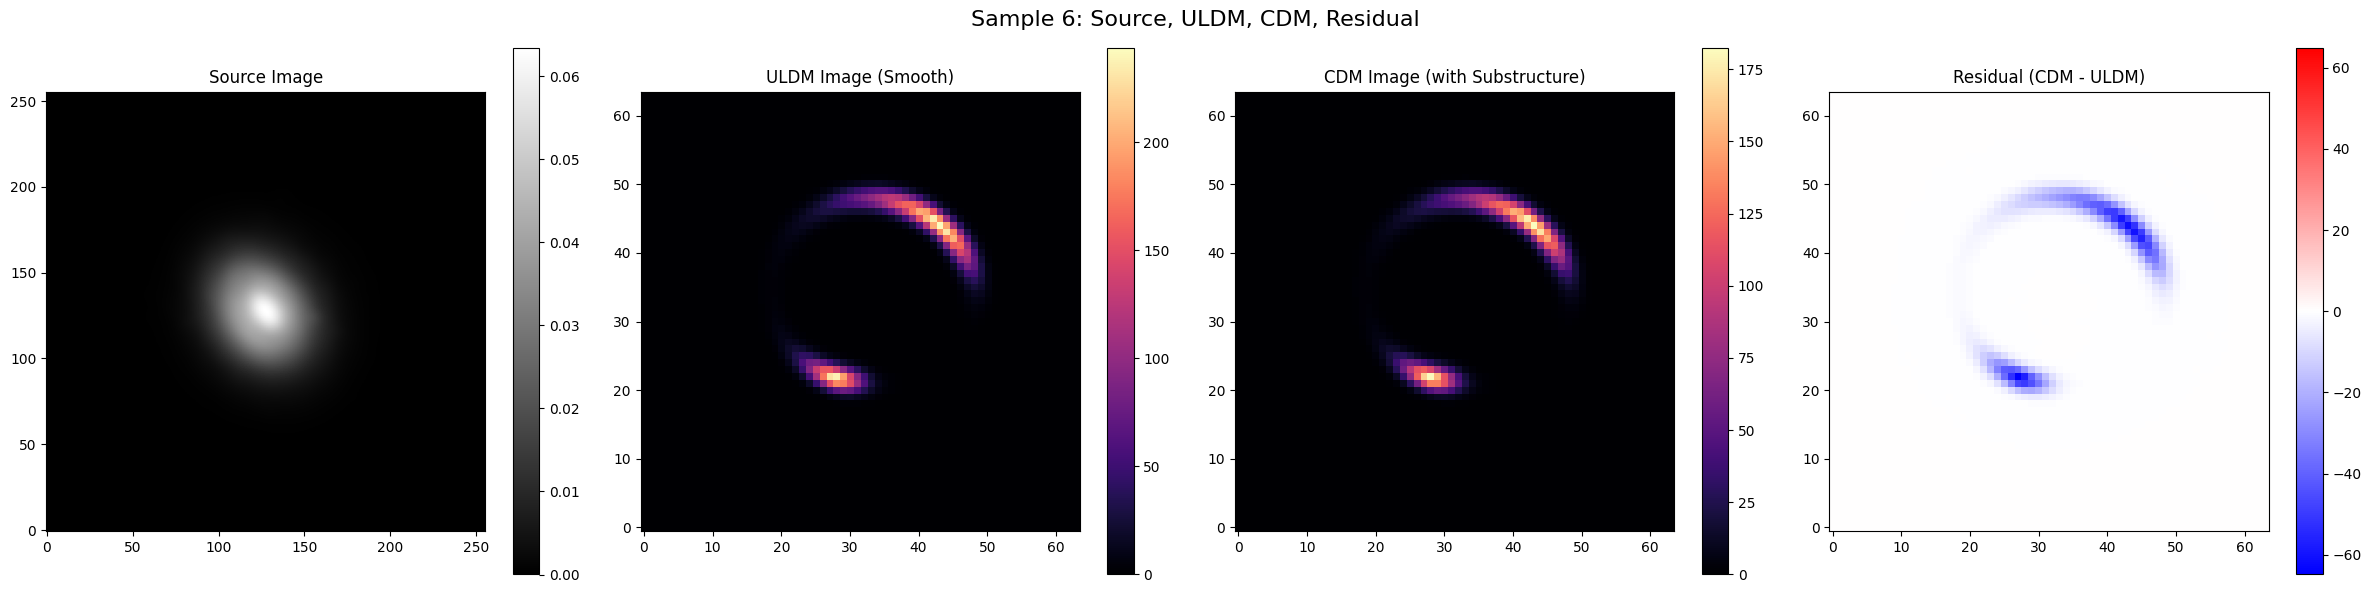

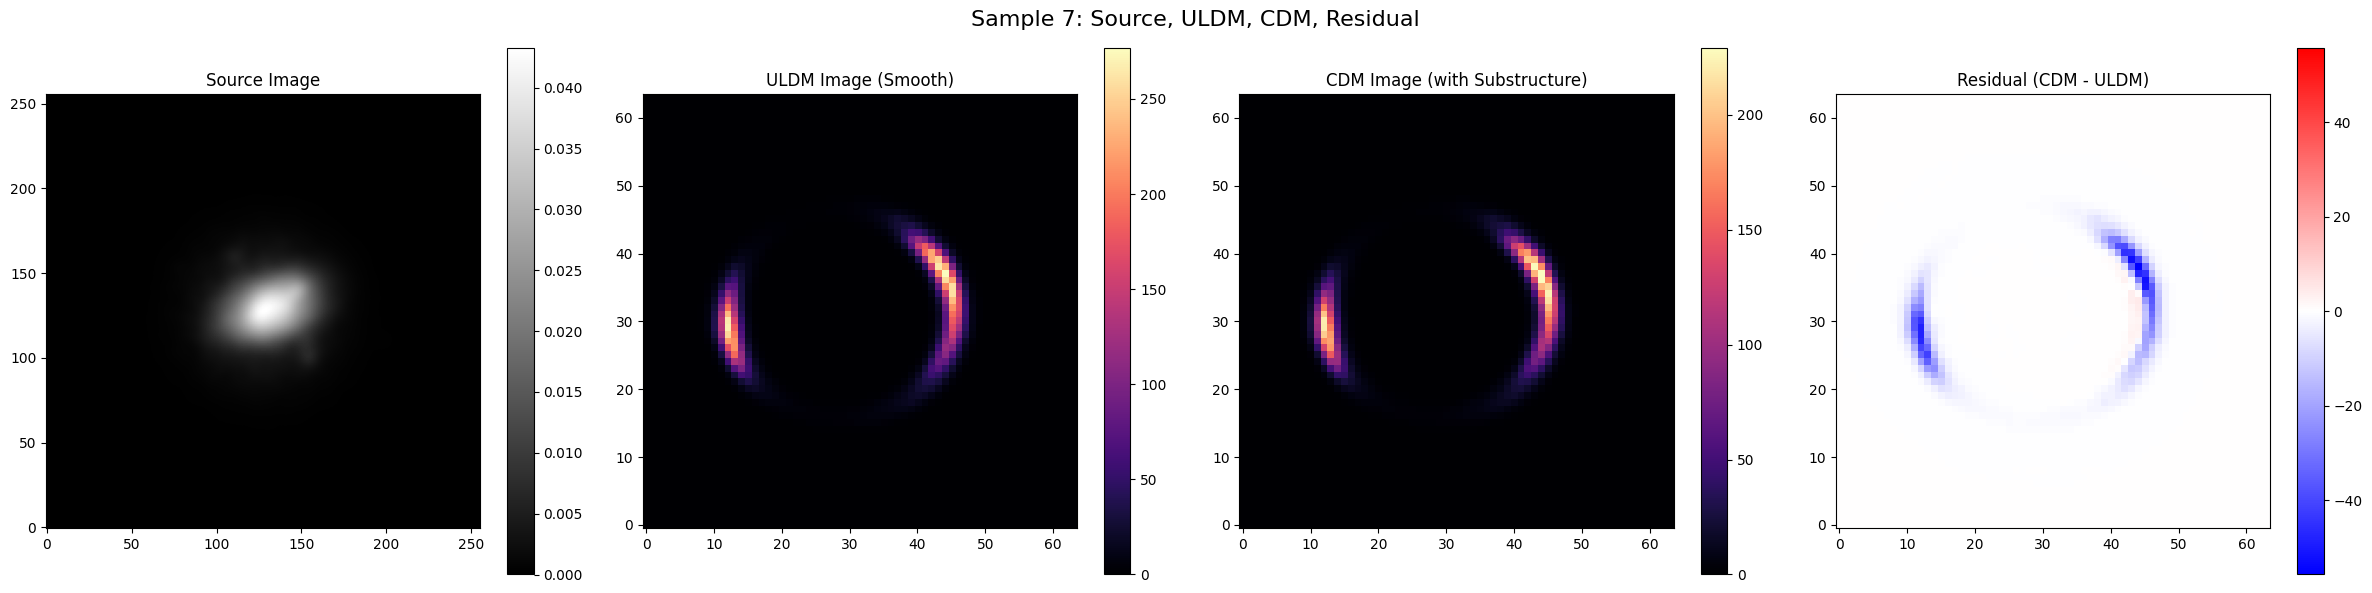

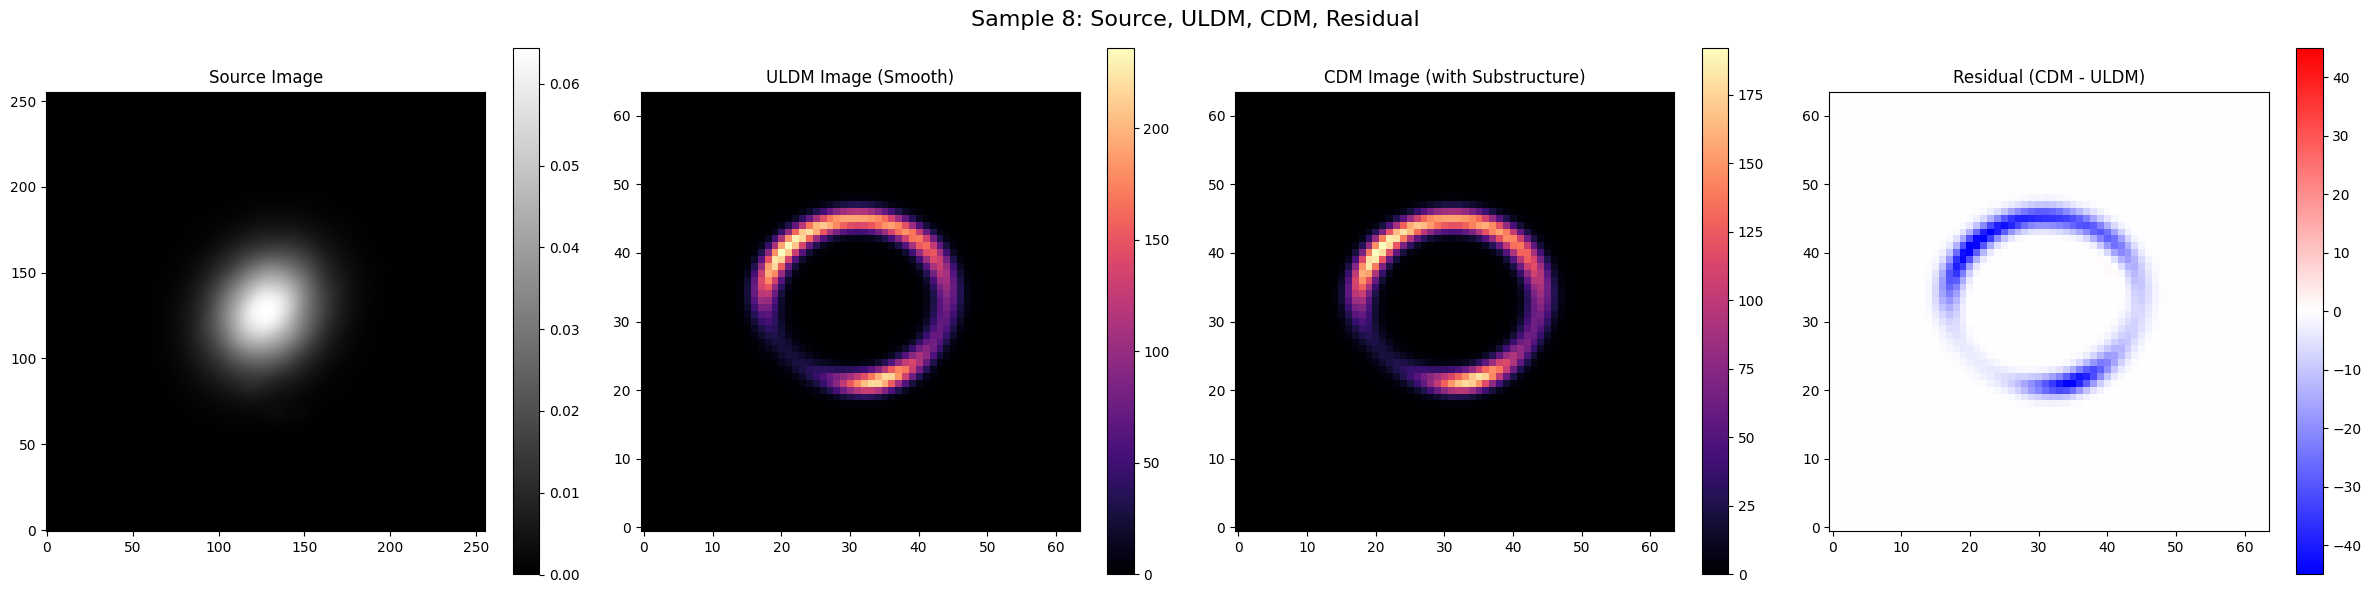

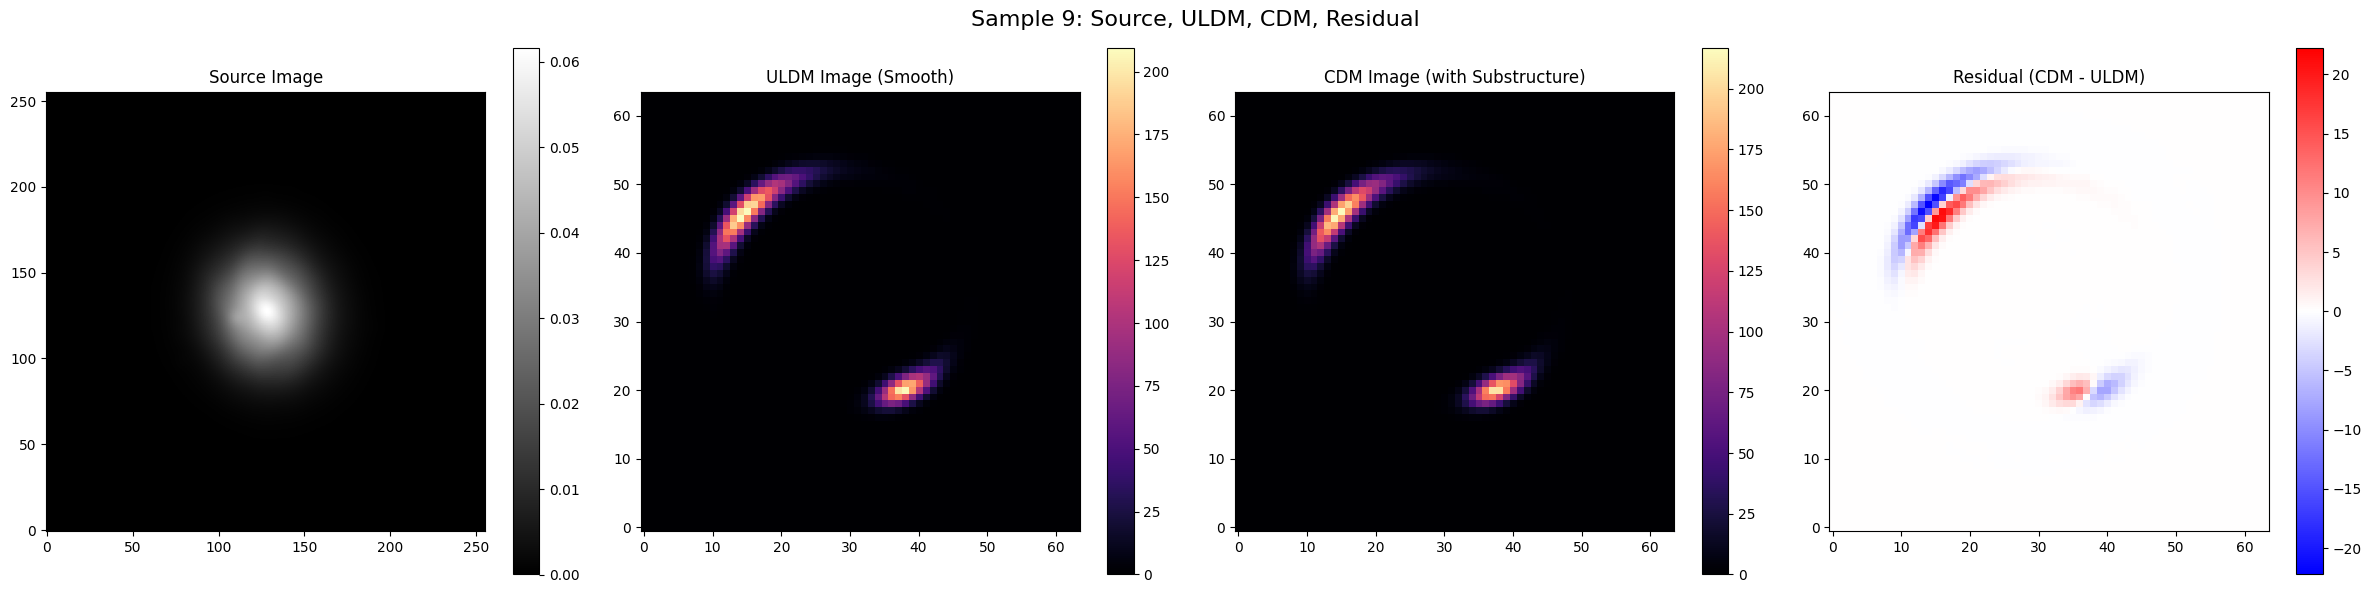

In [7]:
for i in range(10):
    cdm_image = np.load(f"/kaggle/input/paired-dataset/paired_lensing_simulations/cdm_lensed_no_noise_{i}.npy")
    uldm_image = np.load(f"/kaggle/input/paired-dataset/paired_lensing_simulations/uldm_lensed_no_noise_{i}.npy")
    source_image = np.load(f"/kaggle/input/paired-dataset/paired_lensing_simulations/cdm_source_{i}.npy")

    cdm_image = cdm_image.astype(np.float64)
    uldm_image = uldm_image.astype(np.float64)
    source_image = source_image.astype(np.float64)

    residual_image = cdm_image - uldm_image

    fig, axes = plt.subplots(1, 4, figsize=(24, 6))
    fig.suptitle(f"Sample {i}: Source, ULDM, CDM, Residual", fontsize=16)

    im_src = axes[0].imshow(source_image, origin='lower', cmap='gray')
    axes[0].set_title("Source Image")
    fig.colorbar(im_src, ax=axes[0])

    im_uldm = axes[1].imshow(uldm_image, origin='lower', cmap='magma')
    axes[1].set_title("ULDM Image (Smooth)")
    fig.colorbar(im_uldm, ax=axes[1])

    im_cdm = axes[2].imshow(cdm_image, origin='lower', cmap='magma')
    axes[2].set_title("CDM Image (with Substructure)")
    fig.colorbar(im_cdm, ax=axes[2])

    vmax = np.max(np.abs(residual_image))
    im_res = axes[3].imshow(residual_image, origin='lower', cmap='bwr', vmin=-vmax, vmax=vmax)
    axes[3].set_title("Residual (CDM - ULDM)")
    fig.colorbar(im_res, ax=axes[3])

    plt.tight_layout()
    plt.show()


In [4]:
s1 = np.load("/kaggle/input/paired-dataset/paired_lensing_simulations/cdm_source_0.npy")
s2 =  np.load("/kaggle/input/paired-dataset/paired_lensing_simulations/uldm_source_0.npy")

In [5]:
s1==s2

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

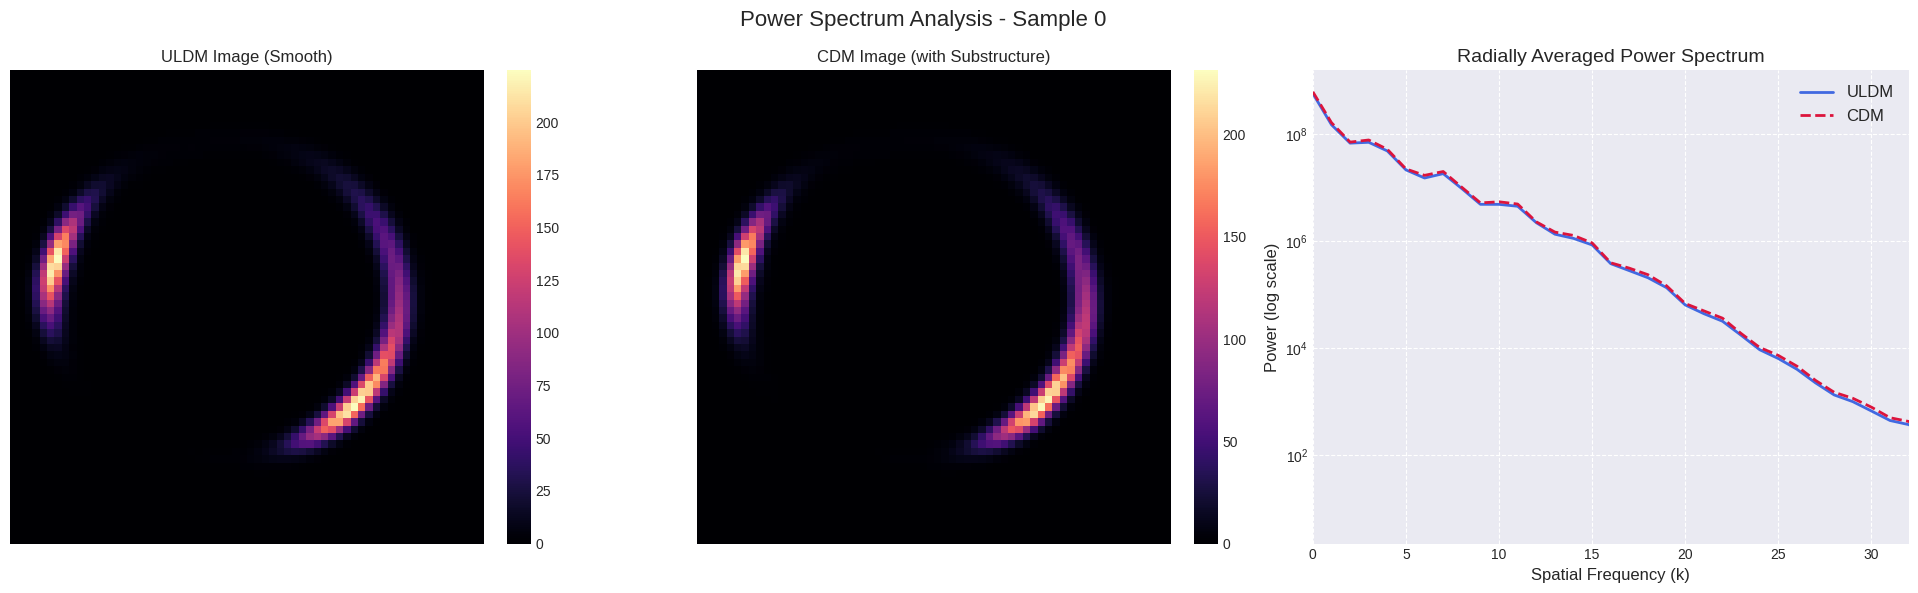

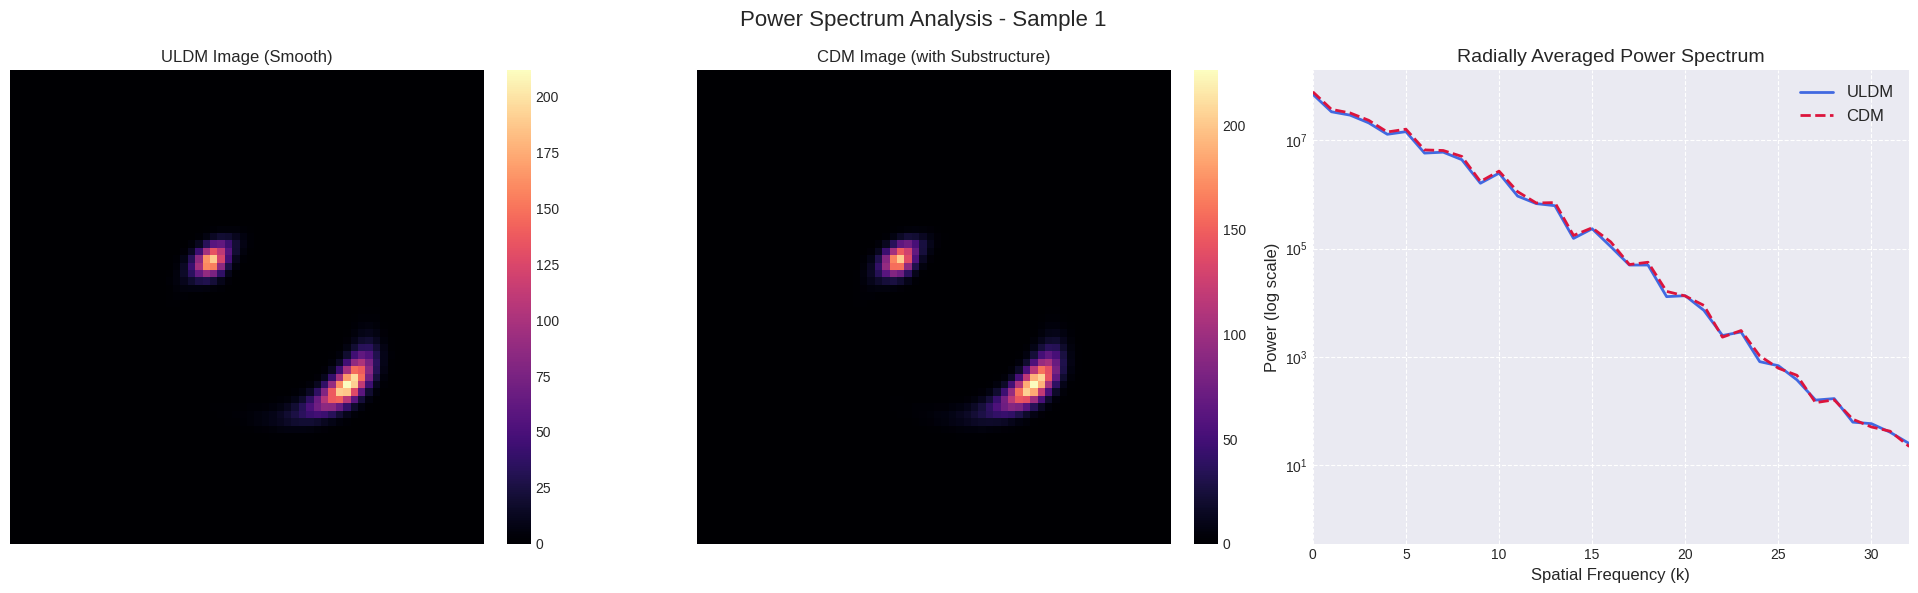

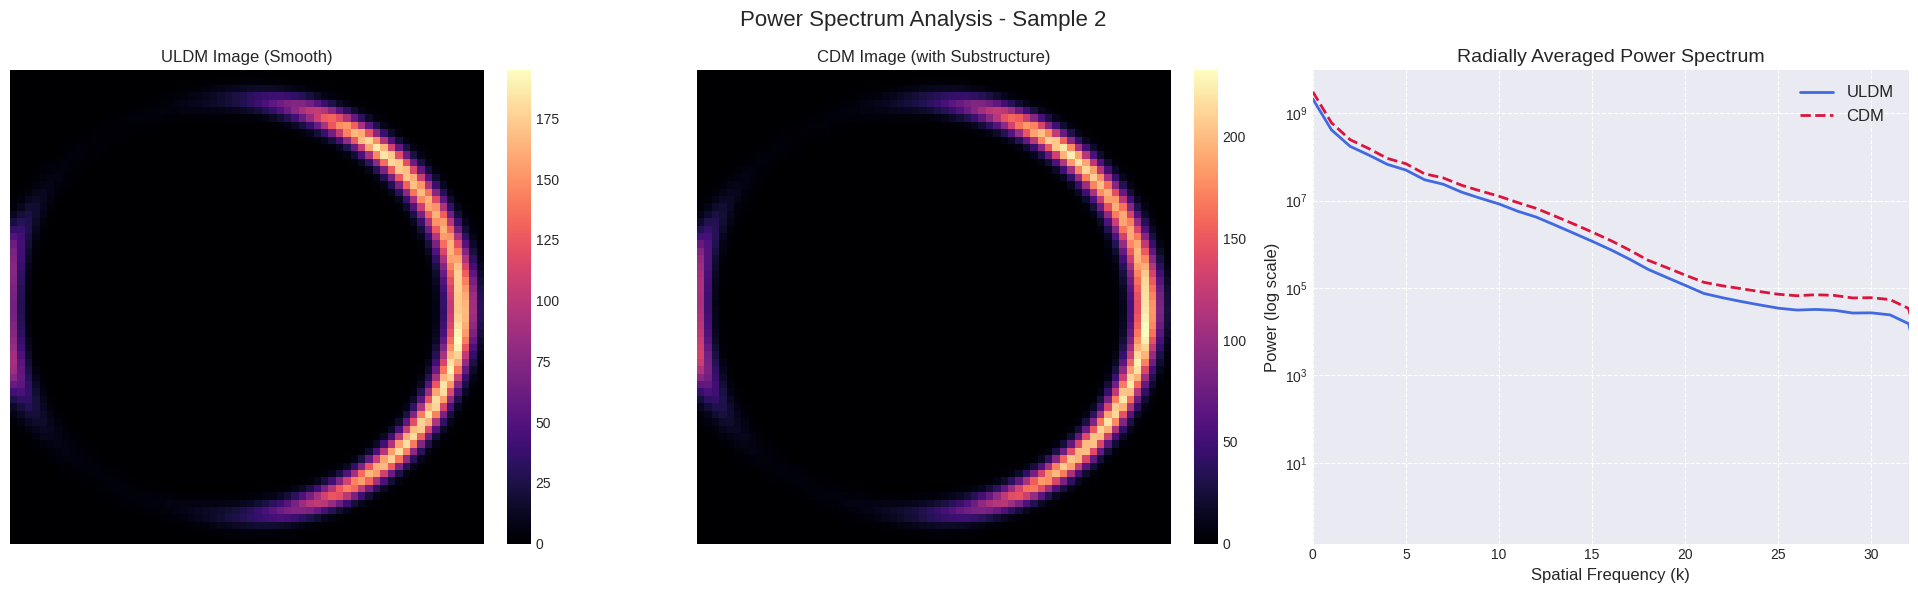

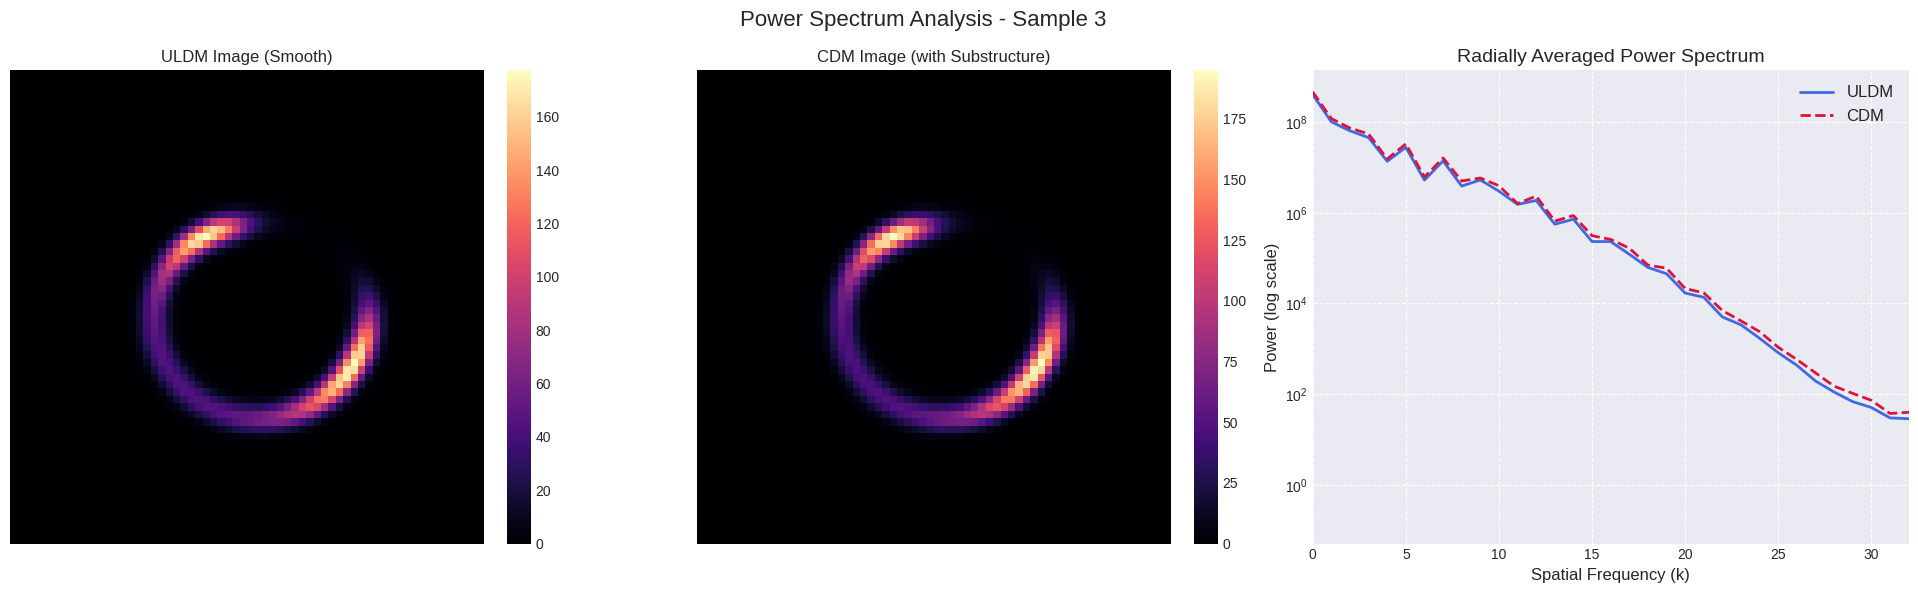

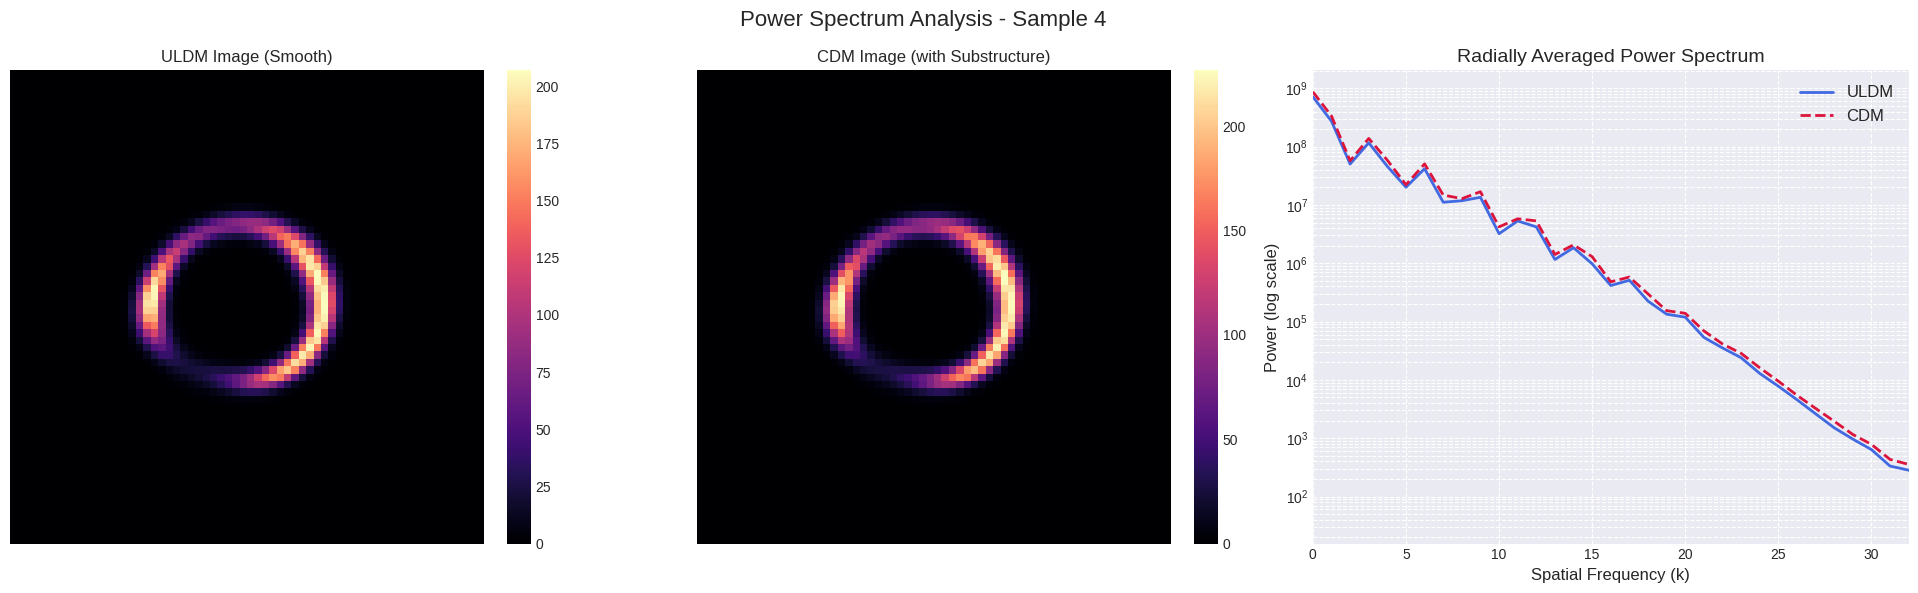

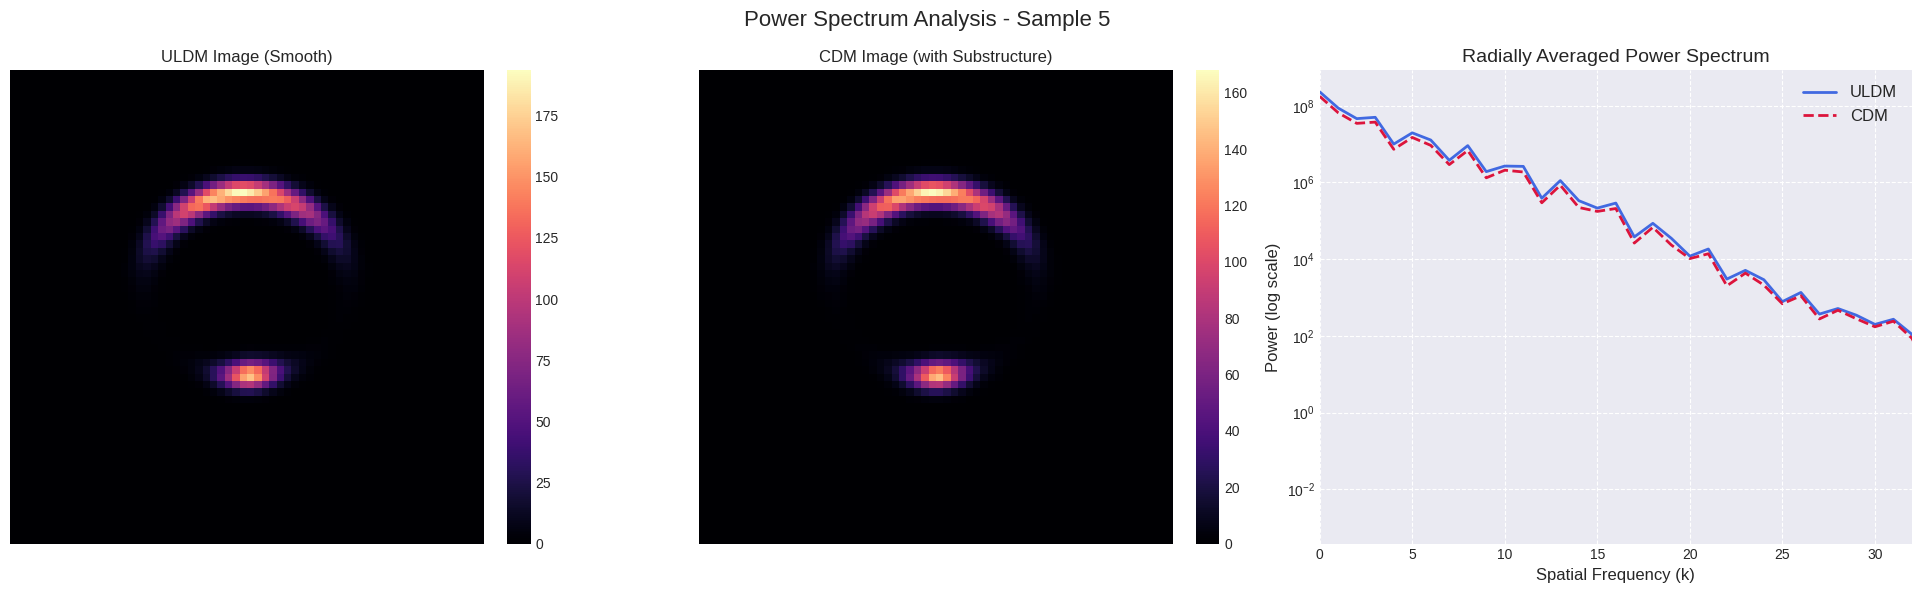

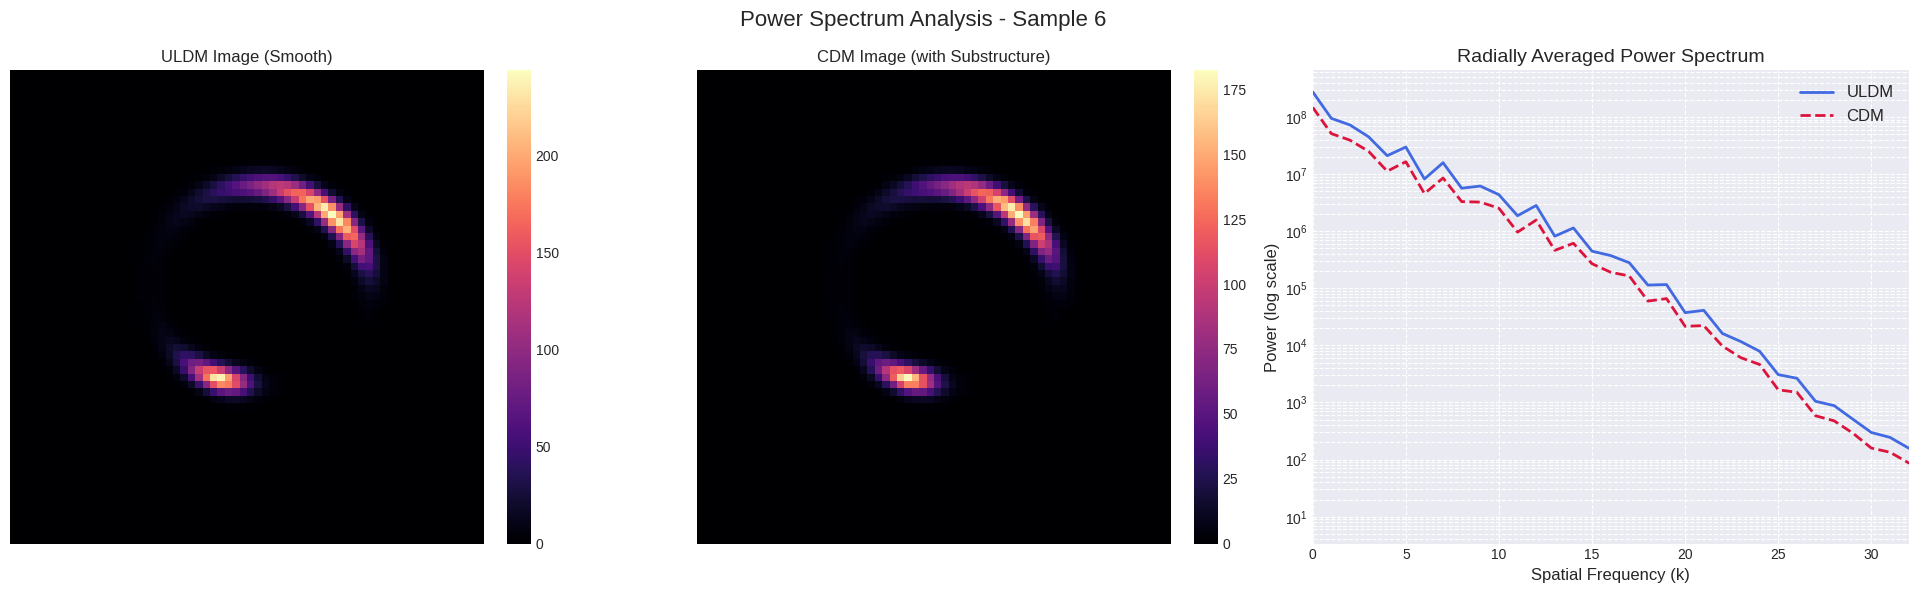

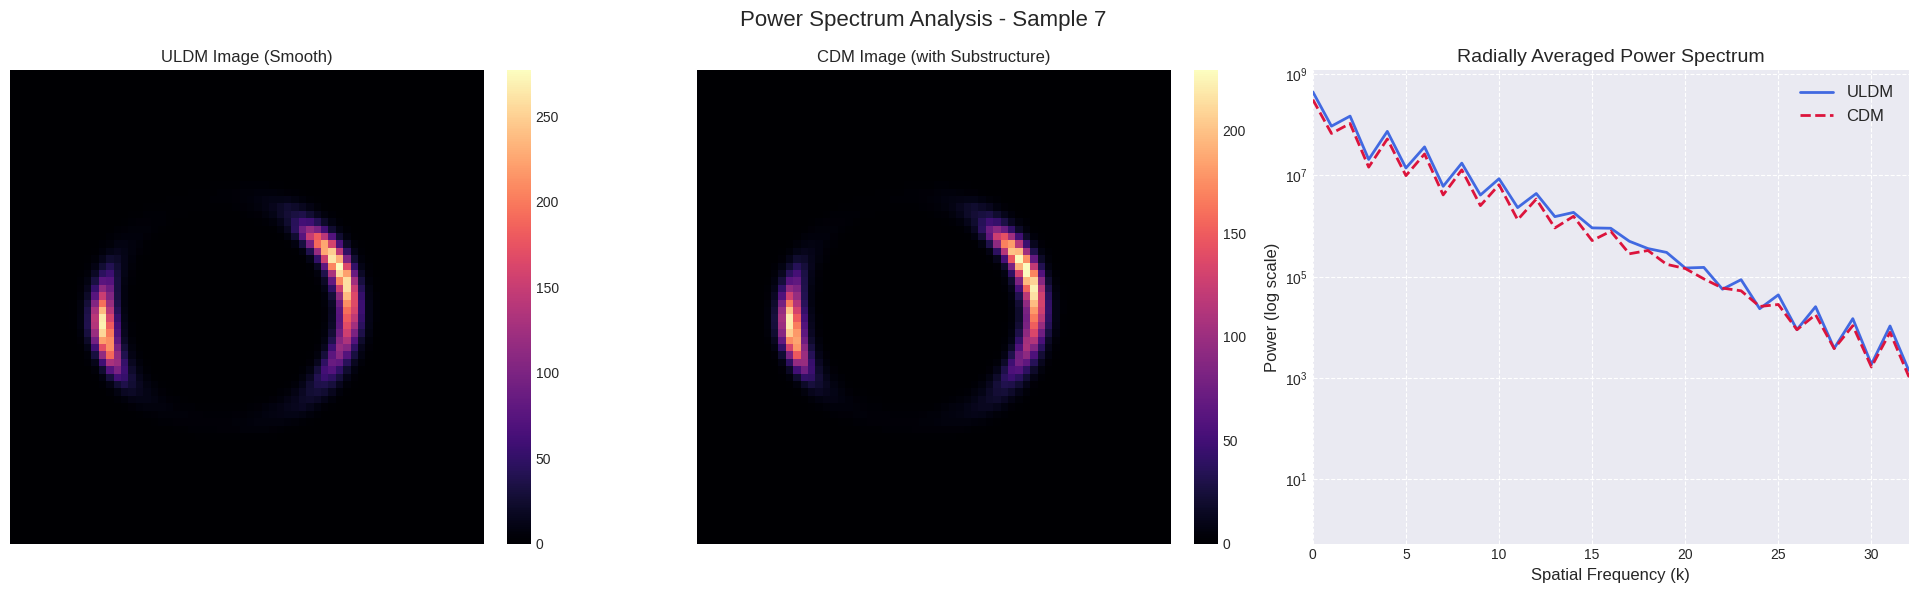

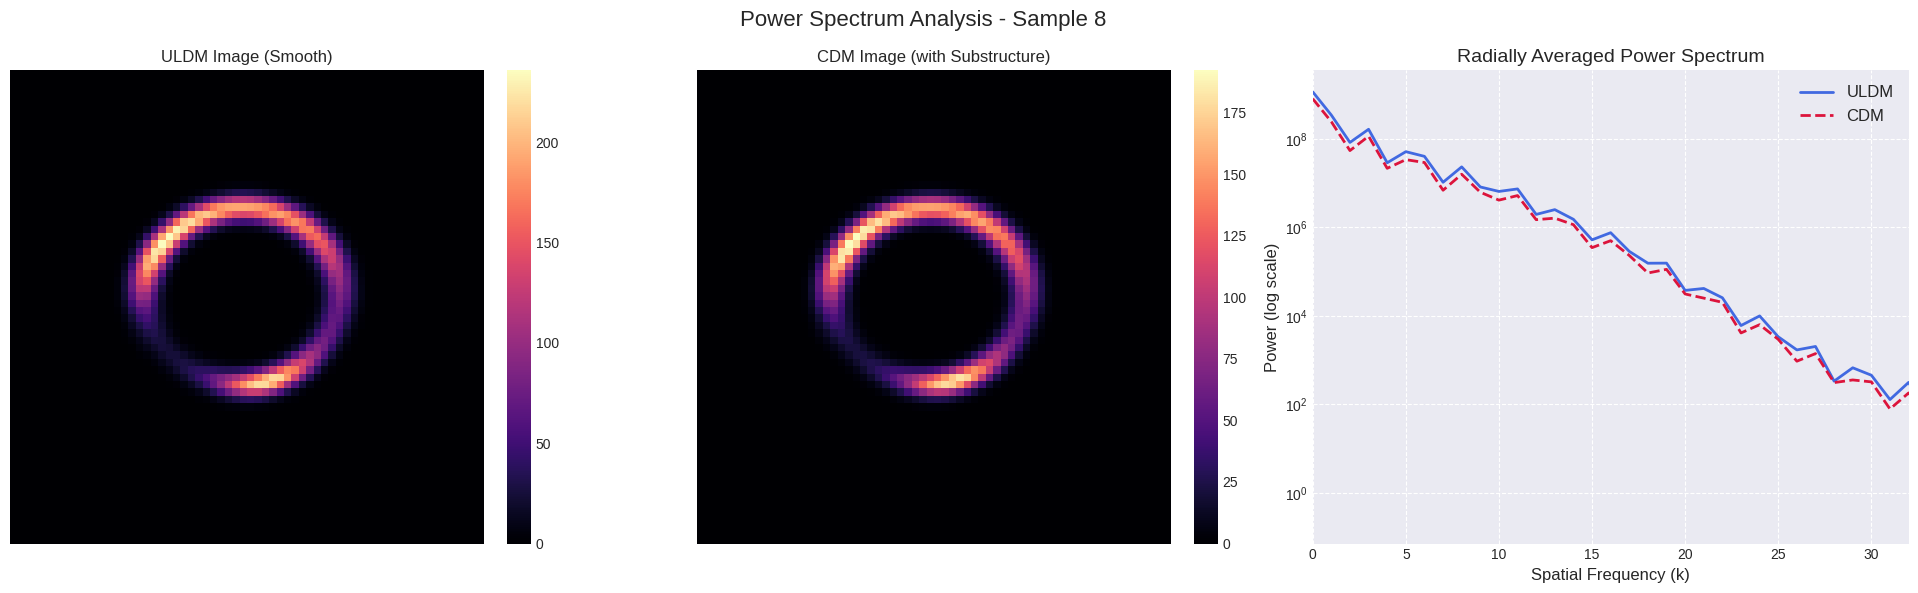

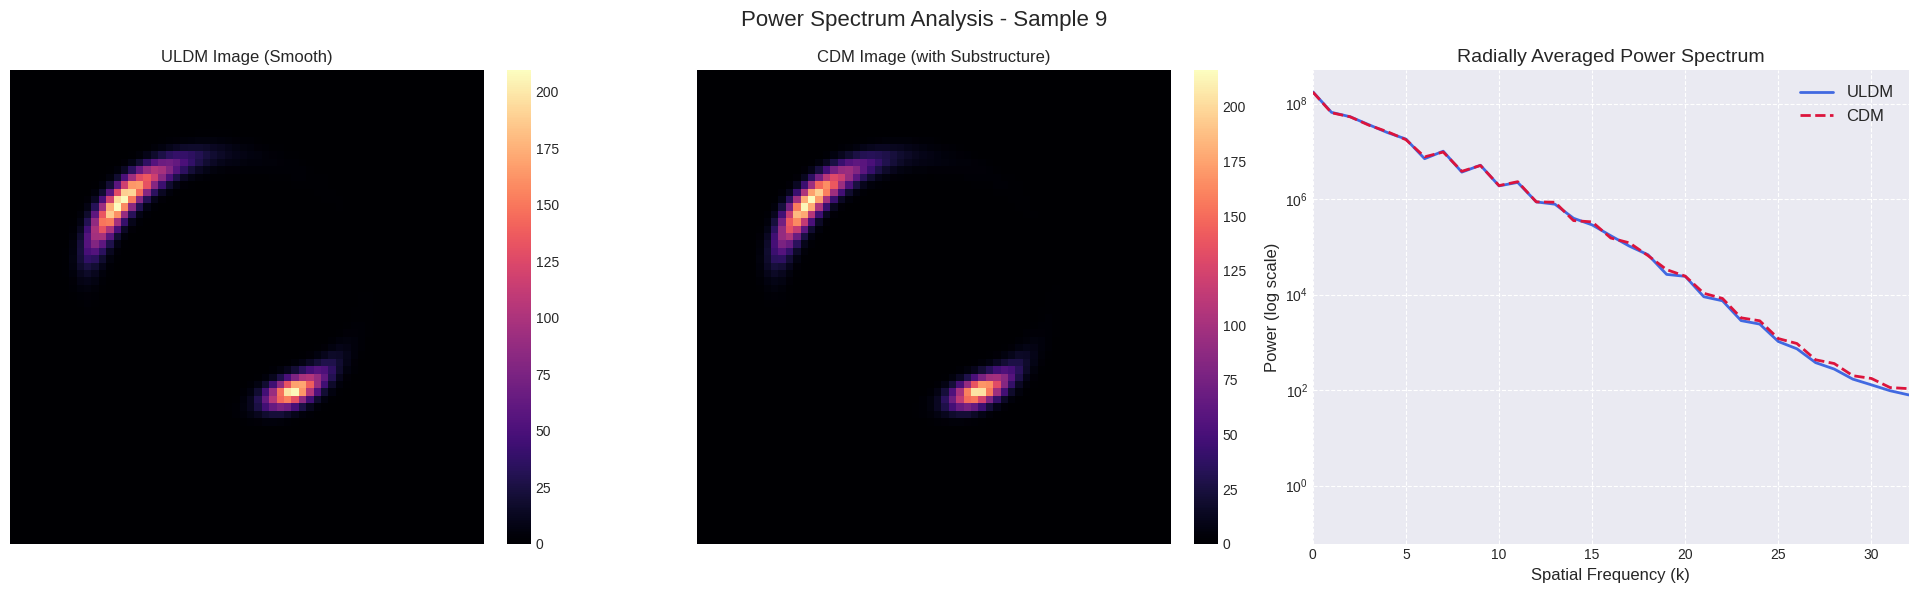

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/paired-dataset/paired_lensing_simulations/uldm_lensed_no_noise_10.npy'

In [9]:
def analyze_and_plot_power_spectra(uldm_image, cdm_image, sample_index):
    """
    Analyzes and compares the power spectra of ULDM and CDM lensed images.
    Plots the input images and their radially averaged 2D power spectra.
    """
    assert uldm_image.shape == cdm_image.shape and len(uldm_image.shape) == 2, \
        "Input images must be 2D arrays of the same shape."

    image_size = uldm_image.shape[0]

    def _radial_power_spectrum(image):
        """Compute the radially averaged 2D power spectrum of a 2D image."""
        fft_image = np.fft.fftshift(np.fft.fft2(image))
        power_2d = np.abs(fft_image) ** 2

        y, x = np.indices(power_2d.shape)
        center_y, center_x = power_2d.shape[0] // 2, power_2d.shape[1] // 2
        radii = np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2).astype(int)

        tbin = np.bincount(radii.ravel(), power_2d.ravel())
        nr = np.bincount(radii.ravel())
        radial_power = np.divide(tbin, nr, out=np.zeros_like(tbin, dtype=float), where=nr != 0)
        freqs = np.arange(len(radial_power))

        return freqs, radial_power

    uldm_freqs, uldm_power = _radial_power_spectrum(uldm_image)
    cdm_freqs, cdm_power = _radial_power_spectrum(cdm_image)

    plt.style.use('seaborn-v0_8-darkgrid')
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    fig.suptitle(f"Power Spectrum Analysis - Sample {sample_index}", fontsize=16)

    im0 = axes[0].imshow(uldm_image, cmap='magma', origin='lower')
    axes[0].set_title("ULDM Image (Smooth)")
    axes[0].axis('off')
    fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)

    im1 = axes[1].imshow(cdm_image, cmap='magma', origin='lower')
    axes[1].set_title("CDM Image (with Substructure)")
    axes[1].axis('off')
    fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)

    axes[2].plot(uldm_freqs, uldm_power, label='ULDM', color='royalblue', lw=2)
    axes[2].plot(cdm_freqs, cdm_power, label='CDM', color='crimson', lw=2, linestyle='--')
    axes[2].set_yscale('log')
    axes[2].set_xlim(0, image_size // 2)
    axes[2].set_title("Radially Averaged Power Spectrum", fontsize=14)
    axes[2].set_xlabel("Spatial Frequency (k)", fontsize=12)
    axes[2].set_ylabel("Power (log scale)", fontsize=12)
    axes[2].legend(fontsize=12)
    axes[2].grid(True, which="both", ls="--")

    plt.tight_layout()
    plt.show()


for i in range(11):
    uldm_path = f"/kaggle/input/paired-dataset/paired_lensing_simulations/uldm_lensed_no_noise_{i}.npy"
    cdm_path = f"/kaggle/input/paired-dataset/paired_lensing_simulations/cdm_lensed_no_noise_{i}.npy"

    uldm_image = np.load(uldm_path).astype(np.float64)
    cdm_image = np.load(cdm_path).astype(np.float64)

    analyze_and_plot_power_spectra(uldm_image, cdm_image, i)
